In [ ]:
from importlib import reload
import capstone as cp
import numpy as np
import pandas as pd
import plotly.graph_objects as go
def plot(x, fn):
    y = map(fn, x)
    go.Figure(data=go.Scatter(x=list(x), y=list(y))).show()
reload(cp)

In [ ]:
#segments
for segment in segments:
    l, u = segments[segment]["age"][0][0], segments[segment]["age"][-1][1]
    print(l, u)
    print(segment)
    plot(np.linspace(l, u, 100), lambda x: age(segment, x))

In [ ]:
# price
for segment in segments:
    l, u = segments[segment]["price"]
    print(l, u)
    print(segment)
    plot(np.linspace(l, u, 100), lambda x: price(segment, x))

In [ ]:
# mtbf
for segment in cp.segments:
    l, u = cp.segments[segment]["mtbf"]
    print(l, u)
    print(segment)
    plot(np.linspace(l-5000, u, 100), lambda x: cp.mtbf(segment, x))

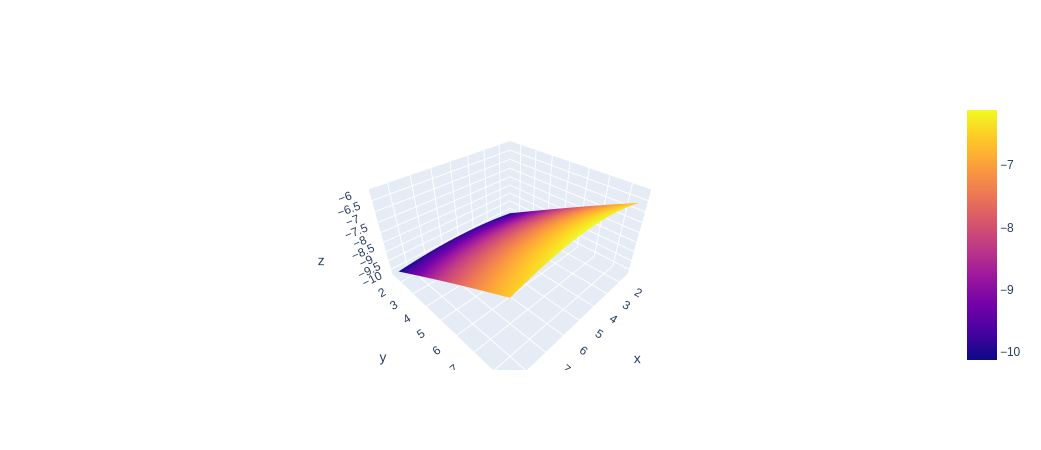

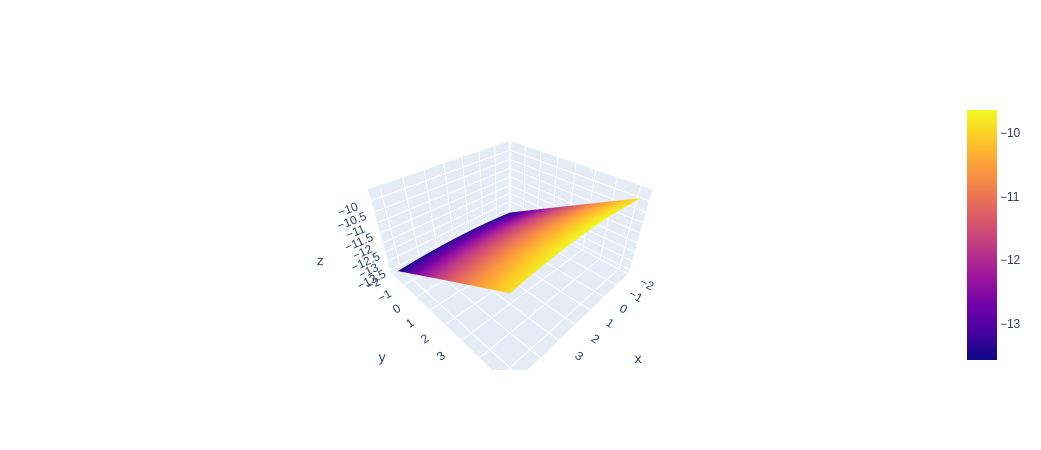

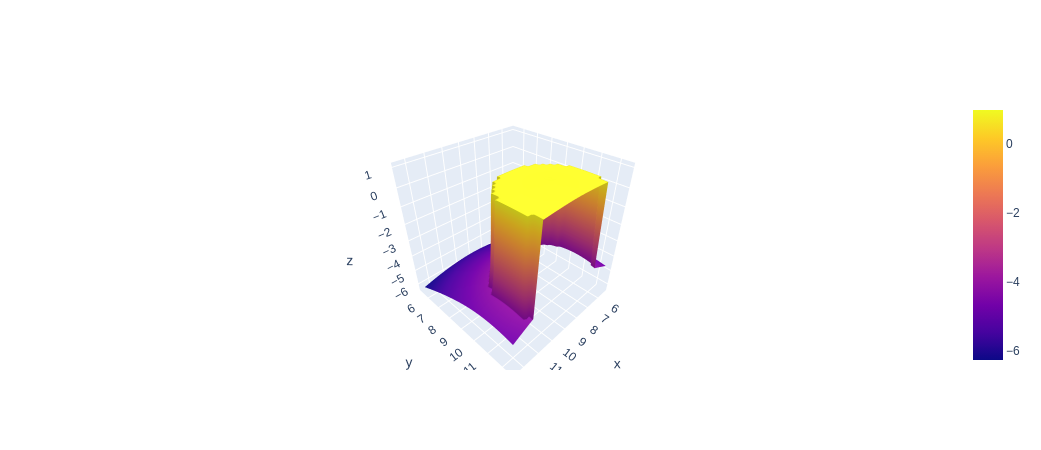

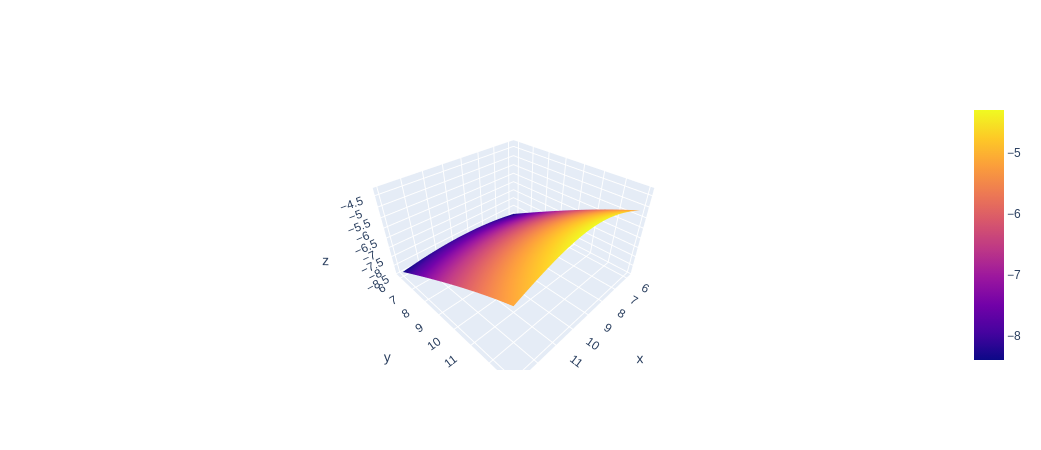

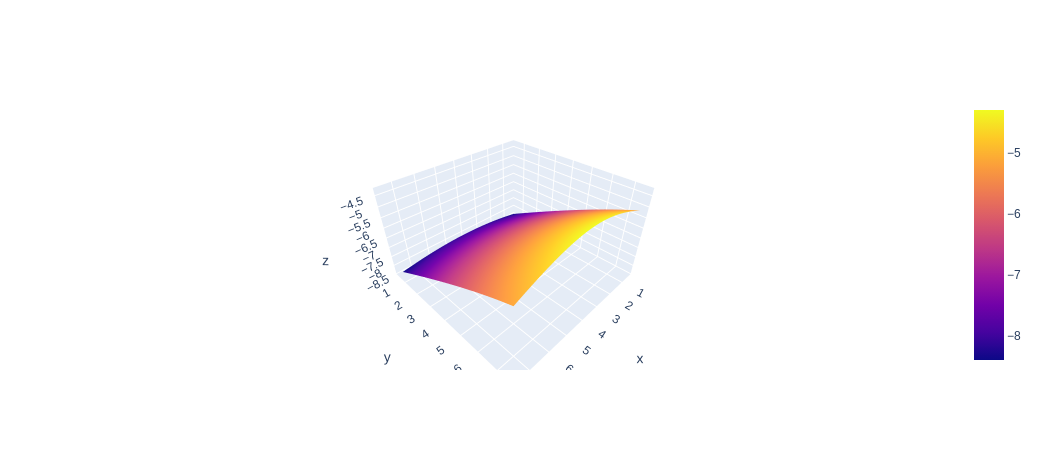

In [28]:
# position
for segment in cp.segments:
    cx, cy = cp.segments[segment]["pos"]
    x = np.outer(np.linspace(cx-3.54, cx+3.54, 30), np.ones(30))
    y = x.copy().T
    zipped = zip(np.reshape(x, -1), np.reshape(y, -1))

    def mapper(p):
        x, y = p
        return cp.position(segment, x, y)
    z = np.reshape(np.fromiter(map(mapper, zipped), float), (30, 30))

    go.Figure(data=go.Surface(x=x, y=y, z=z)).show()



In [19]:
xx = []
yy = []
zz = []
x, y = np.linspace(0, 10, 9), np.linspace(0, 10, 9)

for i in x:
    for j in y:
        k = i+j
        xx.append(i)
        yy.append(j)
        zz.append(k)

print(yy)
go.Figure(data=go.Surface(x=xx, y=yy, z=zz)).show()
        


[0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0]


[[-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
  -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
  -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
   0.48275862  0.62068966  0.75862069  0.89655172  1.03448276  1.17241379
   1.31034483  1.44827586  1.5862069   1.72413793  1.86206897  2.        ]
 [-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
  -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
  -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
   0.48275862  0.62068966  0.75862069  0.89655172  1.03448276  1.17241379
   1.31034483  1.44827586  1.5862069   1.72413793  1.86206897  2.        ]
 [-2.         -1.86206897 -1.72413793 -1.5862069  -1.44827586 -1.31034483
  -1.17241379 -1.03448276 -0.89655172 -0.75862069 -0.62068966 -0.48275862
  -0.34482759 -0.20689655 -0.06896552  0.06896552  0.20689655  0.34482759
   0.48275862  0.62068966  0.7586206

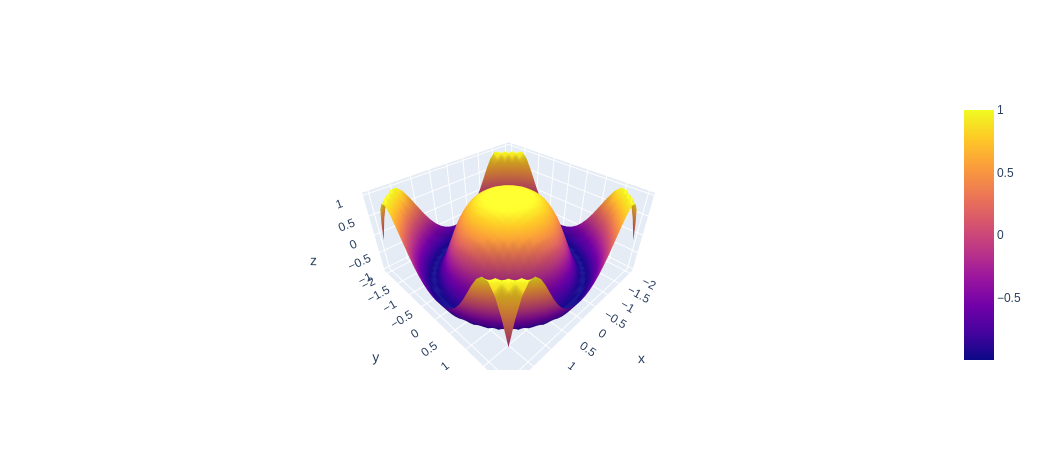

In [22]:
import plotly.graph_objects as go 
import numpy as np 
  
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) 
y = x.copy().T 
z = np.cos(x ** 2 + y ** 2) 
print(y)
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)]) 
  
fig.show() 
